<h2 style="color:Orange;">sales_data.db</h2>

**FOR THE NEW DATABASE IN PY FOR SQLITE3**

In [2]:
import sqlite3

# Create new database connection
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()
# Create correct table structure
cursor.execute('''
    CREATE TABLE sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')
# Insert sample data
data = [
    ('Apples', 10, 2.5),
    ('Bananas', 20, 1.0),
    ('Oranges', 15, 1.5),
    ('Apples', 5, 2.5),
    ('Bananas', 10, 1.0)
]
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', data)
conn.commit()
conn.close()
print("✅ Database and data created successfully.")

✅ Database and data created successfully.


<h2 style="color:orange;">📊 Sales Summary - Task 7</h2>

<span style="background-color:lightyellow;">
    ✅ This task shows how to use SQLite3 in Python to summarize and visualize data.
</span>

In [3]:
# Q1. View All Data

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("SELECT * FROM sales")
rows = cursor.fetchall()

for row in rows:
    print(row)

conn.close()        #To Overview the Task Dataset

(1, 'Apples', 10, 2.5)
(2, 'Bananas', 20, 1.0)
(3, 'Oranges', 15, 1.5)
(4, 'Apples', 5, 2.5)
(5, 'Bananas', 10, 1.0)


In [4]:
# Q2. Total Revenue

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("SELECT SUM(quantity * price) AS total_revenue FROM sales")
total_revenue = cursor.fetchone()[0]

print("💰 Total Revenue:", total_revenue)
conn.close()

💰 Total Revenue: 90.0


In [5]:
# Q3. Quantity Sold per Product

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("SELECT product, SUM(quantity) FROM sales GROUP BY product")
results = cursor.fetchall()

for row in results:
    print(f"{row[0]}: {row[1]} sold")

conn.close()

Apples: 15 sold
Bananas: 30 sold
Oranges: 15 sold


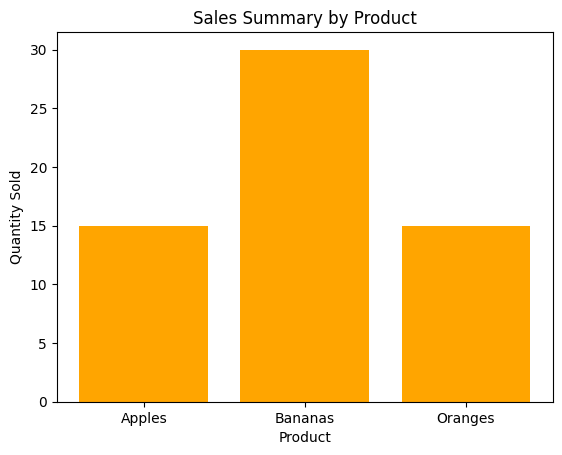

In [6]:
# Q4. Plot with Matplotlib

import matplotlib.pyplot as plt
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("SELECT product, SUM(quantity) FROM sales GROUP BY product")
data = cursor.fetchall()

products = [row[0] for row in data]
quantities = [row[1] for row in data]

plt.bar(products, quantities, color='Orange')
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.title("Sales Summary by Product")
plt.show()

conn.close()

In [7]:
# Q5. 📦 Load Database, Run SQL, Load into Pandas

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Load SQLite database
conn = sqlite3.connect("sales_data.db")

# Run SQL query: Get product, total quantity, total revenue
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

# Load into pandas
df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Print the DataFrame
print("📊 Sales Summary:")
print(df)

📊 Sales Summary:
   product  total_qty  revenue
0   Apples         15     37.5
1  Bananas         30     30.0
2  Oranges         15     22.5


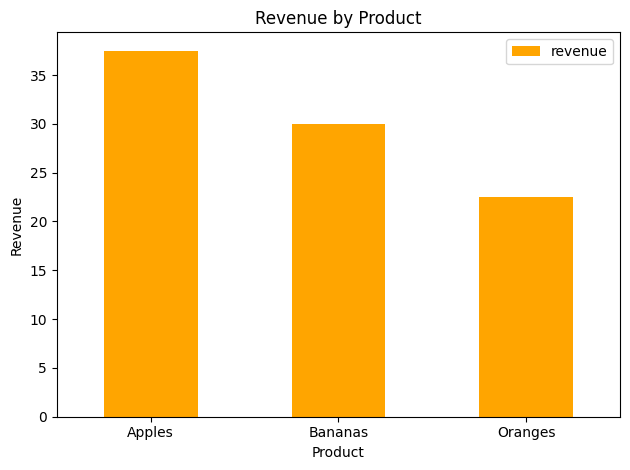

In [12]:
# Q6. 📈 Plot Bar Chart

# Plot basic revenue bar chart
df.plot(kind='bar', x='product', y='revenue', color='orange', legend=True)

plt.title("Revenue by Product")
plt.ylabel('Revenue (INR)')
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.tight_layout()

# Save chart as image
plt.savefig("sales_chart.png")
plt.show()

### Highest Revenue-Generating Product

In [13]:
# Q7. Goal: Show average units sold per product.

query = """
SELECT product, 
       AVG(quantity) AS avg_quantity_sold 
FROM sales 
GROUP BY product
"""

df = pd.read_sql_query(query, sqlite3.connect("sales_data.db"))
print("📦 Average Quantity Sold:\n", df)

📦 Average Quantity Sold:
    product  avg_quantity_sold
0   Apples                7.5
1  Bananas               15.0
2  Oranges               15.0


In [14]:
# Q8. Products with Total Quantity > 15

query = """
SELECT product, 
       SUM(quantity) AS total_quantity 
FROM sales 
GROUP BY product 
HAVING total_quantity > 15
"""

df = pd.read_sql_query(query, sqlite3.connect("sales_data.db"))
print("🚚 High Volume Products:\n", df)                             # Goal: Use WHERE + GROUP BY to filter.

🚚 High Volume Products:
    product  total_quantity
0  Bananas              30


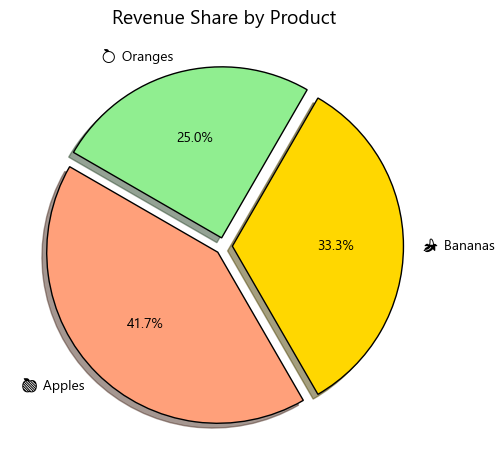

In [15]:
# Q9.  Total Revenue by Product (Pie Chart)
# Goal: Visualize contribution to revenue in %. 

# Import Modules
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import sqlite3

# Query
query = """
SELECT product, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, sqlite3.connect("sales_data.db"))

# Set global font to one that supports emojis
matplotlib.rcParams['font.family'] = 'Segoe UI Emoji'

# Add emojis to product names
emoji_map = {
    'Apples': '🍎 Apples',
    'Bananas': '🍌 Bananas',
    'Oranges': '🍊 Oranges'
}
df['product'] = df['product'].map(emoji_map)

# Professional Pie Chart with Emojis
colors = ['#FFA07A', '#FFD700', '#90EE90']  # 3 colors for 3 products

df.set_index('product').plot.pie(
    y='revenue',
    autopct='%1.1f%%',
    legend=False,
    startangle=150,
    shadow=True,
    colors=colors,
    explode=[0.05]*len(df),  # Slightly explode all slices
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title("Revenue Share by Product", fontsize=14, fontweight='bold', fontname='Segoe UI Emoji')
plt.ylabel("")
plt.tight_layout()
plt.show()

In [16]:
# Q10. Most Frequently Sold Product (Highest Sales Count)

import sqlite3
import pandas as pd

# SQL to find the most frequently sold product (by number of entries)
query = """
SELECT product, 
       COUNT(*) AS sale_count 
FROM sales 
GROUP BY product 
ORDER BY sale_count DESC 
LIMIT 1
"""

df = pd.read_sql_query(query, sqlite3.connect("sales_data.db"))
print("🔄 Most Frequently Sold Product:\n", df)

🔄 Most Frequently Sold Product:
    product  sale_count
0  Bananas           2


## 🐍 Python + SQLite Task Summary

### Q. What is SQLite?
- SQLite is a lightweight, serverless, self-contained SQL database engine.
- It stores the entire database in a single `.db` file.
- No installation or configuration required.

---

### Q. How to Create SQLite Database and Table
```python
import sqlite3

conn = sqlite3.connect('sales.db')
cursor = conn.cursor()
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales_data (
        id INTEGER PRIMARY KEY,
        order_date TEXT,
        product_id INTEGER,
        amount REAL
    )
''')
conn.commit()
conn.close()